In [1]:
import os
import pandas as pd
pd.set_option('display.max_rows', 3000)

In [2]:
import numpy as np
import nibabel as nib # NEUROIMAGEING IN PYTHON
import itk # insight segmentation and registration
import SimpleITK as sitk
import itkwidgets 
from ipywidgets import interact, interactive, IntSlider, ToggleButtons
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

Totally 346 patients, train: 204, test: 142.

In [3]:
dicom_root = "/project2/msca/projects/ProstateMRI/data/PROSTATEx-team1/ProstateX/Train/PROSTATEx/"
intermediate_folder = "/project2/msca/projects/ProstateMRI/data/PROSTATEx-team1/ProstateX/Train/intermediate/"
outputdirectory = os.path.join(intermediate_folder, 'nrrd-test')

In [4]:
train_nrrds = os.listdir('/project2/msca/projects/ProstateMRI/data/PROSTATEx-team1/ProstateX/Train/DATAPREP/nrrd-train/')
test_nrrds = os.listdir('/project2/msca/projects/ProstateMRI/data/PROSTATEx-team1/ProstateX/Test/DATAPREP/nrrd-test/')

In [5]:
train = pd.DataFrame(train_nrrds, columns = ['file'])
test = pd.DataFrame(test_nrrds, columns = ['file'])

In [6]:
train['pid'] = train.file.apply(lambda x: x.split('_',1)[0])
train['series'] = train.file.apply(lambda x: x.split('_',1)[1])
test['pid'] = test.file.apply(lambda x: x.split('_',1)[0])
test['series'] = test.file.apply(lambda x: x.split('_',1)[1])

In [7]:
train

file             pid  \
0                            ProstateX-0147_Ktrans.nrrd  ProstateX-0147   
1     ProstateX-0162_ep2d_diff_tra_DYNDISTCALC_BVAL_...  ProstateX-0162   
2                      ProstateX-0130_t2_tse_sag_3.nrrd  ProstateX-0130   
3     ProstateX-0059_ep2d_diff_tra_DYNDISTCALC_BVAL_...  ProstateX-0059   
4                            ProstateX-0058_Ktrans.nrrd  ProstateX-0058   
5       ProstateX-0012_ep2d_diff_tra_DYNDIST_ADC_8.nrrd  ProstateX-0012   
6                      ProstateX-0013_t2_tse_sag_3.nrrd  ProstateX-0013   
7                      ProstateX-0121_t2_tse_tra_4.nrrd  ProstateX-0121   
8                            ProstateX-0110_Ktrans.nrrd  ProstateX-0110   
9                            ProstateX-0024_Ktrans.nrrd  ProstateX-0024   
10                     ProstateX-0001_t2_tse_cor_5.nrrd  ProstateX-0001   
11                     ProstateX-0088_t2_tse_tra_4.nrrd  ProstateX-0088   
12                           ProstateX-0200_Ktrans.nrrd  ProstateX-0200   
13                     ProstateX-0014_t2_tse_sag_3.nrrd  ProstateX-0014   
14                     ProstateX-0092_t2_tse_cor_5.nrrd  ProstateX-0092   
15      ProstateX-0028_ep2d_diff_tra_DYNDIST_ADC_7.nrrd  ProstateX-0028   
16    ProstateX-0072_ep2d_diff_tra_DYNDISTCALC_BVAL_...  ProstateX-0072   
17                     ProstateX-0018_t2_tse_cor_4.nrrd  ProstateX-0018   
18                           ProstateX-0135_Ktrans.nrrd  ProstateX-0135   
19                           ProstateX-0167_Ktrans.nrrd  ProstateX-0167   
20      ProstateX-0034_ep2d_diff_tra_DYNDIST_ADC_7.nrrd  ProstateX-0034   
21      ProstateX-0023_ep2d_diff_tra_DYNDIST_ADC_7.nrrd  ProstateX-0023   
22                     ProstateX-0152_t2_tse_sag_3.nrrd  ProstateX-0152   
23                     ProstateX-0052_t2_tse_tra_4.nrrd  ProstateX-0052   
24    ProstateX-0170_ep2d_diff_tra_DYNDISTCALC_BVAL_...  ProstateX-0170   
25                           ProstateX-0086_Ktrans.nrrd  ProstateX-0086   
26                     ProstateX-0117_t2_tse_sag_3.nrrd  ProstateX-0117   
27                     ProstateX-0200_t2_tse_sag_4.nrrd  ProstateX-0200   
28    ProstateX-0079_ep2d_diff_tra_DYNDISTCALC_BVAL_...  ProstateX-0079   
29                     ProstateX-0008_t2_tse_sag_3.nrrd  ProstateX-0008   
30                     ProstateX-0025_t2_tse_sag_3.nrrd  ProstateX-0025   
31                     ProstateX-0073_t2_tse_sag_3.nrrd  ProstateX-0073   
32                           ProstateX-0126_Ktrans.nrrd  ProstateX-0126   
33    ProstateX-0003_ep2d_diff_tra_DYNDISTCALC_BVAL_...  ProstateX-0003   
34    ProstateX-0011_ep2d_diff_tra_DYNDISTCALC_BVAL_...  ProstateX-0011   
35                     ProstateX-0124_t2_tse_tra_5.nrrd  ProstateX-0124   
36                     ProstateX-0099_t2_tse_cor_4.nrrd  ProstateX-0099   
37                     ProstateX-0123_t2_tse_tra_5.nrrd  ProstateX-0123   
38                     ProstateX-0187_t2_tse_tra_4.nrrd  ProstateX-0187   
39                           ProstateX-0084_Ktrans.nrrd  ProstateX-0084   
40                     ProstateX-0063_t2_tse_tra_6.nrrd  ProstateX-0063   
41                           ProstateX-0087_Ktrans.nrrd  ProstateX-0087   
42                     ProstateX-0158_t2_tse_cor_5.nrrd  ProstateX-0158   
43                     ProstateX-0003_t2_tse_cor_4.nrrd  ProstateX-0003   
44      ProstateX-0183_ep2d_diff_tra_DYNDIST_ADC_7.nrrd  ProstateX-0183   
45                     ProstateX-0017_t2_tse_tra_5.nrrd  ProstateX-0017   
46                     ProstateX-0002_t2_tse_tra_4.nrrd  ProstateX-0002   
47     ProstateX-0054_ep2d_diff_tra_DYNDIST_ADC_11.nrrd  ProstateX-0054   
48    ProstateX-0116_ep2d_diff_tra_DYNDISTCALC_BVAL_...  ProstateX-0116   
49    ProstateX-0095_ep2d_diff_tra_DYNDIST_MIXCALC_B...  ProstateX-0095   
50                     ProstateX-0042_t2_tse_tra_9.nrrd  ProstateX-0042   
51      ProstateX-0082_ep2d_diff_tra_DYNDIST_ADC_7.nrrd  ProstateX-0082   
52    ProstateX-0055_ep2d_diff_tra_DYNDISTCALC_BVAL_...  ProstateX-0055   
5

In [8]:
train = train[['pid','series']].sort_values(by = 'pid')
test = test[['pid','series']].sort_values(by = 'pid')

In [9]:
train

pid                                             series
137   ProstateX-0000              ep2d_diff_tra_DYNDISTCALC_BVAL_8.nrrd
755   ProstateX-0000                                  t2_tse_cor_5.nrrd
825   ProstateX-0000                   ep2d_diff_tra_DYNDIST_ADC_7.nrrd
541   ProstateX-0000                                  t2_tse_tra_4.nrrd
287   ProstateX-0000                                        Ktrans.nrrd
597   ProstateX-0000                                  t2_tse_sag_3.nrrd
947   ProstateX-0001                                 t2_tse_tra_10.nrrd
60    ProstateX-0001          ep2d_diff_tra_DYNDIST_MIXCALC_BVAL_9.nrrd
10    ProstateX-0001                                  t2_tse_cor_5.nrrd
242   ProstateX-0001                                  t2_tse_sag_4.nrrd
338   ProstateX-0001                                        Ktrans.nrrd
540   ProstateX-0001               ep2d_diff_tra_DYNDIST_MIX_ADC_8.nrrd
1170  ProstateX-0001                                  t2_tse_tra_6.nrrd
539   ProstateX-0002                   ep2d_diff_tra_DYNDIST_ADC_7.nrrd
101   ProstateX-0002                                  t2_tse_sag_3.nrrd
1186  ProstateX-0002              ep2d_diff_tra_DYNDISTCALC_BVAL_8.nrrd
150   ProstateX-0002                                        Ktrans.nrrd
200   ProstateX-0002                                  t2_tse_cor_5.nrrd
46    ProstateX-0002                                  t2_tse_tra_4.nrrd
1200  ProstateX-0003                                  t2_tse_tra_3.nrrd
43    ProstateX-0003                                  t2_tse_cor_4.nrrd
33    ProstateX-0003              ep2d_diff_tra_DYNDISTCALC_BVAL_7.nrrd
1155  ProstateX-0003                                        Ktrans.nrrd
129   ProstateX-0003                                  t2_tse_sag_2.nrrd
244   ProstateX-0003                   ep2d_diff_tra_DYNDIST_ADC_6.nrrd
1224  ProstateX-0004                                  t2_tse_cor_4.nrrd
1108  ProstateX-0004                                  t2_tse_sag_3.nrrd
247   ProstateX-0004                                        Ktrans.nrrd
845   ProstateX-0004               ep2d_diff_tra_DYNDIST_MIX_ADC_7.nrrd
551   ProstateX-0004          ep2d_diff_tra_DYNDIST_MIXCALC_BVAL_8.nrrd
514   ProstateX-0004                                  t2_tse_tra_5.nrrd
853   ProstateX-0005          ep2d_diff_tra_DYNDIST_MIXCALC_BVAL_8.nrrd
1074  ProstateX-0005                                  t2_tse_cor_5.nrrd
374   ProstateX-0005                                  t2_tse_tra_4.nrrd
987   ProstateX-0005               ep2d_diff_tra_DYNDIST_MIX_ADC_7.nrrd
698   ProstateX-0005                                  t2_tse_sag_3.nrrd
694   ProstateX-0005                                        Ktrans.nrrd
1077  ProstateX-0006              ep2d_diff_tra_DYNDISTCALC_BVAL_8.nrrd
1137  ProstateX-0006                                        Ktrans.nrrd
217   ProstateX-0006                                  t2_tse_cor_5.nrrd
1265  ProstateX-0006                                  t2_tse_sag_3.nrrd
1167  ProstateX-0006                   ep2d_diff_tra_DYNDIST_ADC_7.nrrd
543   ProstateX-0006                                  t2_tse_tra_4.nrrd
233   ProstateX-0007                   ep2d_diff_tra_DYNDIST_ADC_8.nrrd
662   ProstateX-0007                                  t2_tse_sag_6.nrrd
512   ProstateX-0007                                  t2_tse_sag_3.nrrd
292   ProstateX-0007              ep2d_diff_tra_DYNDISTCALC_BVAL_9.nrrd
1067  ProstateX-0007                                        Ktrans.nrrd
1088  ProstateX-0007                                  t2_tse_cor_5.nrrd
644   ProstateX-0007                                  t2_tse_tra_4.nrrd
1093  ProstateX-0008                                  t2_tse_sag_6.nrrd
29    ProstateX-0008                                  t2_tse_sag_3.nrrd
1289  ProstateX-0008                                  t2_tse_tra_4.nrrd
960   ProstateX-0008              ep2d_diff_tra_DYNDISTCALC_BVAL_9.nrrd
1166  ProstateX-0008                                  t2_

In [10]:
import re
series = re.compile(r'BVAL|t2_tse_sag|t2_tse_cor|t2_tse_tra|Ktrans|ADC')
train['se_des'] = train.series.apply(lambda x: series.search(x).group())
test['se_des'] = test.series.apply(lambda x: series.search(x).group())

In [11]:
train

pid                                             series  \
137   ProstateX-0000              ep2d_diff_tra_DYNDISTCALC_BVAL_8.nrrd   
755   ProstateX-0000                                  t2_tse_cor_5.nrrd   
825   ProstateX-0000                   ep2d_diff_tra_DYNDIST_ADC_7.nrrd   
541   ProstateX-0000                                  t2_tse_tra_4.nrrd   
287   ProstateX-0000                                        Ktrans.nrrd   
597   ProstateX-0000                                  t2_tse_sag_3.nrrd   
947   ProstateX-0001                                 t2_tse_tra_10.nrrd   
60    ProstateX-0001          ep2d_diff_tra_DYNDIST_MIXCALC_BVAL_9.nrrd   
10    ProstateX-0001                                  t2_tse_cor_5.nrrd   
242   ProstateX-0001                                  t2_tse_sag_4.nrrd   
338   ProstateX-0001                                        Ktrans.nrrd   
540   ProstateX-0001               ep2d_diff_tra_DYNDIST_MIX_ADC_8.nrrd   
1170  ProstateX-0001                                  t2_tse_tra_6.nrrd   
539   ProstateX-0002                   ep2d_diff_tra_DYNDIST_ADC_7.nrrd   
101   ProstateX-0002                                  t2_tse_sag_3.nrrd   
1186  ProstateX-0002              ep2d_diff_tra_DYNDISTCALC_BVAL_8.nrrd   
150   ProstateX-0002                                        Ktrans.nrrd   
200   ProstateX-0002                                  t2_tse_cor_5.nrrd   
46    ProstateX-0002                                  t2_tse_tra_4.nrrd   
1200  ProstateX-0003                                  t2_tse_tra_3.nrrd   
43    ProstateX-0003                                  t2_tse_cor_4.nrrd   
33    ProstateX-0003              ep2d_diff_tra_DYNDISTCALC_BVAL_7.nrrd   
1155  ProstateX-0003                                        Ktrans.nrrd   
129   ProstateX-0003                                  t2_tse_sag_2.nrrd   
244   ProstateX-0003                   ep2d_diff_tra_DYNDIST_ADC_6.nrrd   
1224  ProstateX-0004                                  t2_tse_cor_4.nrrd   
1108  ProstateX-0004                                  t2_tse_sag_3.nrrd   
247   ProstateX-0004                                        Ktrans.nrrd   
845   ProstateX-0004               ep2d_diff_tra_DYNDIST_MIX_ADC_7.nrrd   
551   ProstateX-0004          ep2d_diff_tra_DYNDIST_MIXCALC_BVAL_8.nrrd   
514   ProstateX-0004                                  t2_tse_tra_5.nrrd   
853   ProstateX-0005          ep2d_diff_tra_DYNDIST_MIXCALC_BVAL_8.nrrd   
1074  ProstateX-0005                                  t2_tse_cor_5.nrrd   
374   ProstateX-0005                                  t2_tse_tra_4.nrrd   
987   ProstateX-0005               ep2d_diff_tra_DYNDIST_MIX_ADC_7.nrrd   
698   ProstateX-0005                                  t2_tse_sag_3.nrrd   
694   ProstateX-0005                                        Ktrans.nrrd   
1077  ProstateX-0006              ep2d_diff_tra_DYNDISTCALC_BVAL_8.nrrd   
1137  ProstateX-0006                                        Ktrans.nrrd   
217   ProstateX-0006                                  t2_tse_cor_5.nrrd   
1265  ProstateX-0006                                  t2_tse_sag_3.nrrd   
1167  ProstateX-0006                   ep2d_diff_tra_DYNDIST_ADC_7.nrrd   
543   ProstateX-0006                                  t2_tse_tra_4.nrrd   
233   ProstateX-0007                   ep2d_diff_tra_DYNDIST_ADC_8.nrrd   
662   ProstateX-0007                                  t2_tse_sag_6.nrrd   
512   ProstateX-0007                                  t2_tse_sag_3.nrrd   
292   ProstateX-0007              ep2d_diff_tra_DYNDISTCALC_BVAL_9.nrrd   
1067  ProstateX-0007                                        Ktrans.nrrd   
1088  ProstateX-0007                                  t2_tse_cor_5.nrrd   
644   ProstateX-0007                                  t2_tse_tra_4.nrrd   
1093  ProstateX-0008                                  t2_tse_sag_6.nrrd   
29    ProstateX-0008                                  t2_tse_sag_3.nrrd   
1289  ProstateX-0008                      

In [12]:
nseries_by_patient_train = train.groupby('pid')['se_des'].count()
nseries_by_patient_test = test.groupby('pid')['se_des'].count()
nseries_by_patient_train

pid
ProstateX-0000     6
ProstateX-0001     7
ProstateX-0002     6
ProstateX-0003     6
ProstateX-0004     6
ProstateX-0005     6
ProstateX-0006     6
ProstateX-0007     7
ProstateX-0008     7
ProstateX-0009     6
ProstateX-0010     7
ProstateX-0011     7
ProstateX-0012     7
ProstateX-0013     6
ProstateX-0014     6
ProstateX-0015     6
ProstateX-0016     6
ProstateX-0017     6
ProstateX-0018     6
ProstateX-0019     7
ProstateX-0020     6
ProstateX-0021     6
ProstateX-0022     6
ProstateX-0023     6
ProstateX-0024     6
ProstateX-0025     6
ProstateX-0026     6
ProstateX-0027     6
ProstateX-0028     6
ProstateX-0029     6
ProstateX-0030     6
ProstateX-0031     9
ProstateX-0032     7
ProstateX-0033     6
ProstateX-0034     7
ProstateX-0035     6
ProstateX-0036     6
ProstateX-0037     6
ProstateX-0038     6
ProstateX-0039     6
ProstateX-0040     6
ProstateX-0041     6
ProstateX-0042     7
ProstateX-0043     6
ProstateX-0044     6
ProstateX-0045     6
ProstateX-0046     6
ProstateX

In [13]:
series_count_train = train.groupby('se_des').count()
series_count_test = test.groupby('se_des').count()

In [14]:
series_count_train

pid  series
se_des                 
ADC         210     210
BVAL        208     208
Ktrans      204     204
t2_tse_cor  206     206
t2_tse_sag  218     218
t2_tse_tra  256     256

In [15]:
series_count_test

pid  series
se_des                 
ADC         145     145
BVAL        142     142
Ktrans      121     121
t2_tse_cor  142     142
t2_tse_sag  153     153
t2_tse_tra  174     174

In [16]:
# each patient should have 6 unique series ideally, but some of them have more than 6 series, keep in mind
n_series_train = train.groupby('pid')['series'].count()
n_series_train.value_counts()

6     142
7      52
8       7
9       2
12      1
Name: series, dtype: int64

In [17]:
# each patient should have 6 unique series ideally, but some of them have more than 6 series, keep in mind
n_series_test = test.groupby('pid')['series'].count()
n_series_test.value_counts()

6    91
7    27
5    17
8     6
9     1
Name: series, dtype: int64

# Read in csv
The distribution of zones between test and train are similar. There are only 2 observations in SV zone for both train and test. PZ, TZ are two largest zones, which have imbalanced T/Fs.
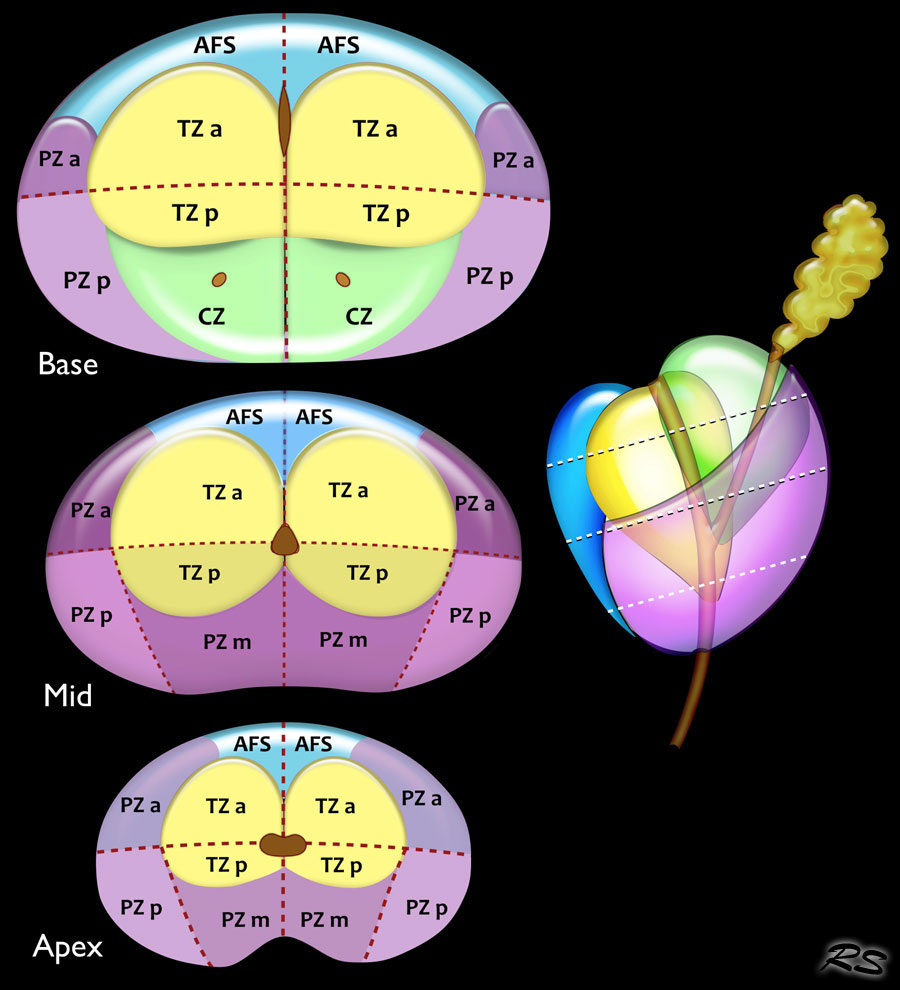

In [18]:
train_finding = pd.read_csv('/project2/msca/projects/ProstateMRI/data/PROSTATEx-team1/Training_Lesion_Information/ProstateX-Findings-Train.csv')
train_ktrans = pd.read_csv('/project2/msca/projects/ProstateMRI/data/PROSTATEx-team1/Training_Lesion_Information/ProstateX-Images-KTrans-Train.csv')
train_images = pd.read_csv('/project2/msca/projects/ProstateMRI/data/PROSTATEx-team1/Training_Lesion_Information/ProstateX-Images-Train.csv')

In [19]:
test_finding = pd.read_csv('/project2/msca/projects/ProstateMRI/data/PROSTATEx-team1/Test_Lesion_Information/ProstateX-Findings-Test.csv')
test_ktrans = pd.read_csv('/project2/msca/projects/ProstateMRI/data/PROSTATEx-team1/Test_Lesion_Information/ProstateX-Images-KTrans-Test.csv')
test_images = pd.read_csv('/project2/msca/projects/ProstateMRI/data/PROSTATEx-team1/Test_Lesion_Information/ProstateX-Images-Test.csv')

In [20]:
train_finding.head()

ProxID  fid                                                pos  \
0  ProstateX-0000    1                            25.7457 31.8707 -38.511   
1  ProstateX-0001    1  -40.5367071921656 29.320722668457 -16.70766907...   
2  ProstateX-0002    1                          -27.0102 41.5467 -26.0469   
3  ProstateX-0002    2                            -2.058 38.6752 -34.6104   
4  ProstateX-0003    1                           22.1495 31.2717 -2.45933   

  zone  ClinSig  
0   PZ     True  
1   AS    False  
2   PZ     True  
3   PZ    False  
4   TZ    False

In [21]:
train_count_by_zone = pd.DataFrame(train_finding.groupby(['zone','ClinSig'])['zone'].count())
train_count_by_zone

zone
zone ClinSig      
AS   False      24
     True       31
PZ   False     155
     True       36
SV   False       2
TZ   False      73
     True        9

In [22]:
test_count_by_zone = pd.DataFrame(train_finding.groupby(['zone'])['zone'].count())
test_count_by_zone 

zone
zone      
AS      55
PZ     191
SV       2
TZ      82

# Sanity Check

In [23]:
!ls /project2/msca/projects/ProstateMRI/data/PROSTATEx-team1/Training_Lesion_Information

ProstateX-DataInfo-Train.docx	   ProstateX-Images-Train.csv
ProstateX-Findings-Train.csv	   train_pixle_extracted.csv
ProstateX-Images-KTrans-Train.csv  train_pixle_extracted_patient25.csv


In [24]:
image_info = pd.read_csv('/project2/msca/projects/ProstateMRI/data/PROSTATEx-team1/Training_Lesion_Information/ProstateX-Images-Train.csv')

In [25]:
image_info.head()

ProxID                             Name  fid  \
0  ProstateX-0000       ep2d_diff_tra_DYNDIST_ADC0    1   
1  ProstateX-0000           ep2d_diff_tra_DYNDIST0    1   
2  ProstateX-0000           ep2d_diff_tra_DYNDIST1    1   
3  ProstateX-0000           ep2d_diff_tra_DYNDIST2    1   
4  ProstateX-0000  ep2d_diff_tra_DYNDISTCALC_BVAL0    1   

                       pos                                        WorldMatrix  \
0  25.7457 31.8707 -38.511  2,4.0067e-010,0.00377059,-46.6873,-0.000797221...   
1  25.7457 31.8707 -38.511  2,4.0067e-010,0.00377059,-46.6873,-0.000797221...   
2  25.7457 31.8707 -38.511  2,4.0067e-010,0.00377059,-46.6873,-0.000797221...   
3  25.7457 31.8707 -38.511  2,4.0067e-010,0.00377059,-46.6873,-0.000797221...   
4  25.7457 31.8707 -38.511  2,4.0067e-010,0.00377059,-46.6873,-0.000797221...   

       ijk  TopLevel  SpacingBetweenSlices VoxelSpacing          Dim  \
0  36 72 9       1.0                   3.0        2,2,3  84x128x19x1   
1  36 72 9       1.0                   3.0        2,2,3  84x128x19x1   
2  36 72 9       1.0                   3.0        2,2,3  84x128x19x1   
3  36 72 9       1.0                   3.0        2,2,3  84x128x19x1   
4  36 72 9       1.0                   3.0        2,2,3  84x128x19x1   

                      DCMSerDescr  DCMSerNum  
0       ep2d_diff_tra_DYNDIST_ADC          7  
1           ep2d_diff_tra_DYNDIST          6  
2           ep2d_diff_tra_DYNDIST          6  
3           ep2d_diff_tra_DYNDIST          6  
4  ep2d_diff_tra_DYNDISTCALC_BVAL          8

In [26]:
image_info['series']= image_info.DCMSerDescr+'_'+image_info.DCMSerNum.apply(lambda x: str(x))+'.nrrd'
image_info

ProxID                             Name  fid  \
0     ProstateX-0000       ep2d_diff_tra_DYNDIST_ADC0    1   
1     ProstateX-0000           ep2d_diff_tra_DYNDIST0    1   
2     ProstateX-0000           ep2d_diff_tra_DYNDIST1    1   
3     ProstateX-0000           ep2d_diff_tra_DYNDIST2    1   
4     ProstateX-0000  ep2d_diff_tra_DYNDISTCALC_BVAL0    1   
...              ...                              ...  ...   
3864  ProstateX-0203           tfl_3d_dynamisch_fast0    2   
3865  ProstateX-0203           tfl_3d_dynamisch_fast0    1   
3866  ProstateX-0203           tfl_3d_dynamisch_fast0    2   
3867  ProstateX-0203             tfl_3d_PD_reference0    1   
3868  ProstateX-0203             tfl_3d_PD_reference0    2   

                                                    pos  \
0                               25.7457 31.8707 -38.511   
1                               25.7457 31.8707 -38.511   
2                               25.7457 31.8707 -38.511   
3                               25.7457 31.8707 -38.511   
4                               25.7457 31.8707 -38.511   
...                                                 ...   
3864  10.0280456542969 -4.62264251708984 -90.3759994...   
3865                        -10.02681 -18.5905 -75.1691   
3866  10.0280456542969 -4.62264251708984 -90.3759994...   
3867                        -10.02681 -18.5905 -75.1691   
3868  10.0280456542969 -4.62264251708984 -90.3759994...   

                                            WorldMatrix      ijk  TopLevel  \
0     2,4.0067e-010,0.00377059,-46.6873,-0.000797221...  36 72 9       1.0   
1     2,4.0067e-010,0.00377059,-46.6873,-0.000797221...  36 72 9       1.0   
2     2,4.0067e-010,0.00377059,-46.6873,-0.000797221...  36 72 9       1.0   
3     2,4.0067e-010,0.00377059,-46.6873,-0.000797221...  36 72 9       1.0   
4     2,4.0067e-010,0.00377059,-46.6873,-0.000797221...  36 72 9       1.0   
...                                                 ...      ...       ...   
3864  1.79688,3.68545e-010,-1.13355e-016,-116.895,-3...  71 65 5       NaN   
3865  1.79688,3.68545e-010,-1.13355e-016,-116.895,-3...  59 56 7       NaN   
3866  1.79688,3.68545e-010,-1.13355e-016,-116.895,-3...  71 65 5       NaN   
3867  1.79688,3.68545e-010,-1.13355e-016,-116.895,-3...  59 56 7       NaN   
3868  1.79688,3.68545e-010,-1.13355e-016,-116.895,-3...  71 65 5       NaN   

      SpacingBetweenSlices         VoxelSpacing           Dim  \
0                      3.0                2,2,3   84x128x19x1   
1                      3.0                2,2,3   84x128x19x1   
2                      3.0                2,2,3   84x128x19x1   
3                      3.0                2,2,3   84x128x19x1   
4                      3.0                2,2,3   84x128x19x1   
...                    ...                  ...           ...   
3864                   4.5  1.79688,1.79688,4.5  128x128x12x1   
3865                   4.5  1.79688,1.79688,4.5  128x128x12x1   
3866                   4.5  1.79688,1.79688,4.5  128x128x12x1   
3867                   4.5  1.79688,1.79688,4.5  128x128x12x1   
3868                   4.5  1.79688,1.79688,4.5  128x128x12x1   

                         DCMSerDescr  DCMSerNum  \
0          ep2d_diff_tra_DYNDIST_ADC          7   
1              ep2d_diff_tra_DYNDIST          6   
2              ep2d_diff_tra_DYNDIST          6   
3              ep2d_diff_tra_DYNDIST          6   
4     ep2d_diff_tra_DYNDISTCALC_BVAL          8   
...                              ...        ...   
3864           tfl_3d dynamisch fast         18   
3865           tfl_3d dynamisch fast         19   
3866           tfl_3d dynamisch fast         19   
3867             tfl_3d PD reference         10   
3868             tfl_3d PD reference         10   

                                     series  
0          ep2d_diff_tra_DYNDIST_ADC_7.nrrd  
1              ep2d_diff_tra_DYNDIST_6.nrrd  
2              ep2d_diff_tra_DYNDIST_6.nrrd  
3              ep2d_diff_tra_DYNDIST_6.nrrd  

In [35]:
train_merged = image_info.merge(train, left_on =['ProxID','series'], right_on =['pid','series'], how = 'outer')

In [36]:
train_merged.head()

ProxID                             Name  fid  \
0  ProstateX-0000       ep2d_diff_tra_DYNDIST_ADC0  1.0   
1  ProstateX-0000           ep2d_diff_tra_DYNDIST0  1.0   
2  ProstateX-0000           ep2d_diff_tra_DYNDIST1  1.0   
3  ProstateX-0000           ep2d_diff_tra_DYNDIST2  1.0   
4  ProstateX-0000  ep2d_diff_tra_DYNDISTCALC_BVAL0  1.0   

                       pos                                        WorldMatrix  \
0  25.7457 31.8707 -38.511  2,4.0067e-010,0.00377059,-46.6873,-0.000797221...   
1  25.7457 31.8707 -38.511  2,4.0067e-010,0.00377059,-46.6873,-0.000797221...   
2  25.7457 31.8707 -38.511  2,4.0067e-010,0.00377059,-46.6873,-0.000797221...   
3  25.7457 31.8707 -38.511  2,4.0067e-010,0.00377059,-46.6873,-0.000797221...   
4  25.7457 31.8707 -38.511  2,4.0067e-010,0.00377059,-46.6873,-0.000797221...   

       ijk  TopLevel  SpacingBetweenSlices VoxelSpacing          Dim  \
0  36 72 9       1.0                   3.0        2,2,3  84x128x19x1   
1  36 72 9       1.0                   3.0        2,2,3  84x128x19x1   
2  36 72 9       1.0                   3.0        2,2,3  84x128x19x1   
3  36 72 9       1.0                   3.0        2,2,3  84x128x19x1   
4  36 72 9       1.0                   3.0        2,2,3  84x128x19x1   

                      DCMSerDescr  DCMSerNum  \
0       ep2d_diff_tra_DYNDIST_ADC        7.0   
1           ep2d_diff_tra_DYNDIST        6.0   
2           ep2d_diff_tra_DYNDIST        6.0   
3           ep2d_diff_tra_DYNDIST        6.0   
4  ep2d_diff_tra_DYNDISTCALC_BVAL        8.0   

                                  series             pid se_des  
0       ep2d_diff_tra_DYNDIST_ADC_7.nrrd  ProstateX-0000    ADC  
1           ep2d_diff_tra_DYNDIST_6.nrrd             NaN    NaN  
2           ep2d_diff_tra_DYNDIST_6.nrrd             NaN    NaN  
3           ep2d_diff_tra_DYNDIST_6.nrrd             NaN    NaN  
4  ep2d_diff_tra_DYNDISTCALC_BVAL_8.nrrd  ProstateX-0000   BVAL

In [38]:
train_merged.to_csv('sanity_check.csv')

In [37]:
train_merged.shape

(4075, 15)

In [32]:
train.shape

(1302, 3)

In [150]:
# each patient should has 6 series
a = train.drop_duplicates().groupby('pid').count().merge(train.set_index('pid'), on ='pid')
b = a[a.series_x > 6].groupby(['pid','se_des_y']).count()
b[b.series_x > 1]

series_x  se_des_x  series_y
pid            se_des_y                                
ProstateX-0001 t2_tse_tra         2         2         2
ProstateX-0007 t2_tse_sag         2         2         2
ProstateX-0008 t2_tse_sag         2         2         2
ProstateX-0010 t2_tse_tra         2         2         2
ProstateX-0011 t2_tse_tra         2         2         2
ProstateX-0012 t2_tse_sag         2         2         2
ProstateX-0019 t2_tse_tra         2         2         2
ProstateX-0031 ADC                2         2         2
               BVAL               2         2         2
               t2_tse_tra         2         2         2
ProstateX-0032 t2_tse_tra         2         2         2
ProstateX-0034 t2_tse_tra         2         2         2
ProstateX-0042 t2_tse_tra         2         2         2
ProstateX-0052 t2_tse_tra         2         2         2
ProstateX-0054 t2_tse_tra         2         2         2
ProstateX-0057 t2_tse_sag         2         2         2
ProstateX-0059 t2_tse_sag         2         2         2
ProstateX-0061 t2_tse_tra         2         2         2
ProstateX-0063 t2_tse_sag         2         2         2
ProstateX-0074 t2_tse_tra         3         3         3
ProstateX-0077 t2_tse_tra         2         2         2
ProstateX-0079 t2_tse_tra         2         2         2
ProstateX-0086 t2_tse_sag         2         2         2
ProstateX-0095 t2_tse_tra         2         2         2
ProstateX-0097 t2_tse_tra         2         2         2
ProstateX-0098 t2_tse_tra         2         2         2
ProstateX-0099 t2_tse_tra         2         2         2
ProstateX-0101 t2_tse_tra         2         2         2
ProstateX-0102 t2_tse_tra         2         2         2
ProstateX-0105 t2_tse_tra         2         2         2
ProstateX-0112 t2_tse_tra         2         2         2
ProstateX-0113 t2_tse_tra         2         2         2
ProstateX-0114 t2_tse_sag         2         2         2
               t2_tse_tra         2         2         2
ProstateX-0116 t2_tse_tra         2         2         2
ProstateX-0122 t2_tse_tra         2         2         2
ProstateX-0123 t2_tse_tra         2         2         2
ProstateX-0125 t2_tse_tra         2         2         2
ProstateX-0126 t2_tse_tra         2         2         2
ProstateX-0128 t2_tse_sag         2         2         2
ProstateX-0132 t2_tse_tra         2         2         2
ProstateX-0141 t2_tse_tra         2         2         2
ProstateX-0147 t2_tse_tra         2         2         2
ProstateX-0148 t2_tse_tra         2         2         2
ProstateX-0149 t2_tse_tra         2         2         2
ProstateX-0152 t2_tse_tra         2         2         2
ProstateX-0153 t2_tse_tra         2         2         2
ProstateX-0155 t2_tse_tra         2         2         2
ProstateX-0160 t2_tse_tra         2         2         2
ProstateX-0165 t2_tse_tra         2         2         2
ProstateX-0166 t2_tse_sag         2         2         2
               t2_tse_tra         2         2         2
ProstateX-0168 t2_tse_cor         2         2         2
               t2_tse_tra         2         2         2
ProstateX-0171 t2_tse_tra         2         2         2
ProstateX-0173 t2_tse_sag         2         2         2
               t2_tse_tra         3         3         3
ProstateX-0176 t2_tse_tra         2         2         2
ProstateX-0179 t2_tse_sag         2         2         2
               t2_tse_tra         2         2         2
ProstateX-0181 t2_tse_tra         2         2         2
ProstateX-0185 t2_tse_tra         2         2         2
ProstateX-0186 t2_tse_tra         2         2         2
ProstateX-0189 t2_tse_cor         2         2         2
ProstateX-0190 ADC                2         2         2
               BVAL               2         2         2
ProstateX-0191 ADC                5         5         5
               BVAL               3         3         3
ProstateX-0197 t2_tse_sag         2         2         2
               t2_tse_tra         2         2      

In [50]:
train[train.pid == 'ProstateX-0002']

pid                                 series      se_des
539   ProstateX-0002       ep2d_diff_tra_DYNDIST_ADC_7.nrrd         ADC
101   ProstateX-0002                      t2_tse_sag_3.nrrd  t2_tse_sag
1186  ProstateX-0002  ep2d_diff_tra_DYNDISTCALC_BVAL_8.nrrd        BVAL
150   ProstateX-0002                            Ktrans.nrrd      Ktrans
200   ProstateX-0002                      t2_tse_cor_5.nrrd  t2_tse_cor
46    ProstateX-0002                      t2_tse_tra_4.nrrd  t2_tse_tra

In [33]:
image_info.shape

(3869, 13)

Image size: 320 320 15 (0.6000000238418599, 0.6000000238418601, 2.9999988079071045)


<IPython.core.display.Javascript object>


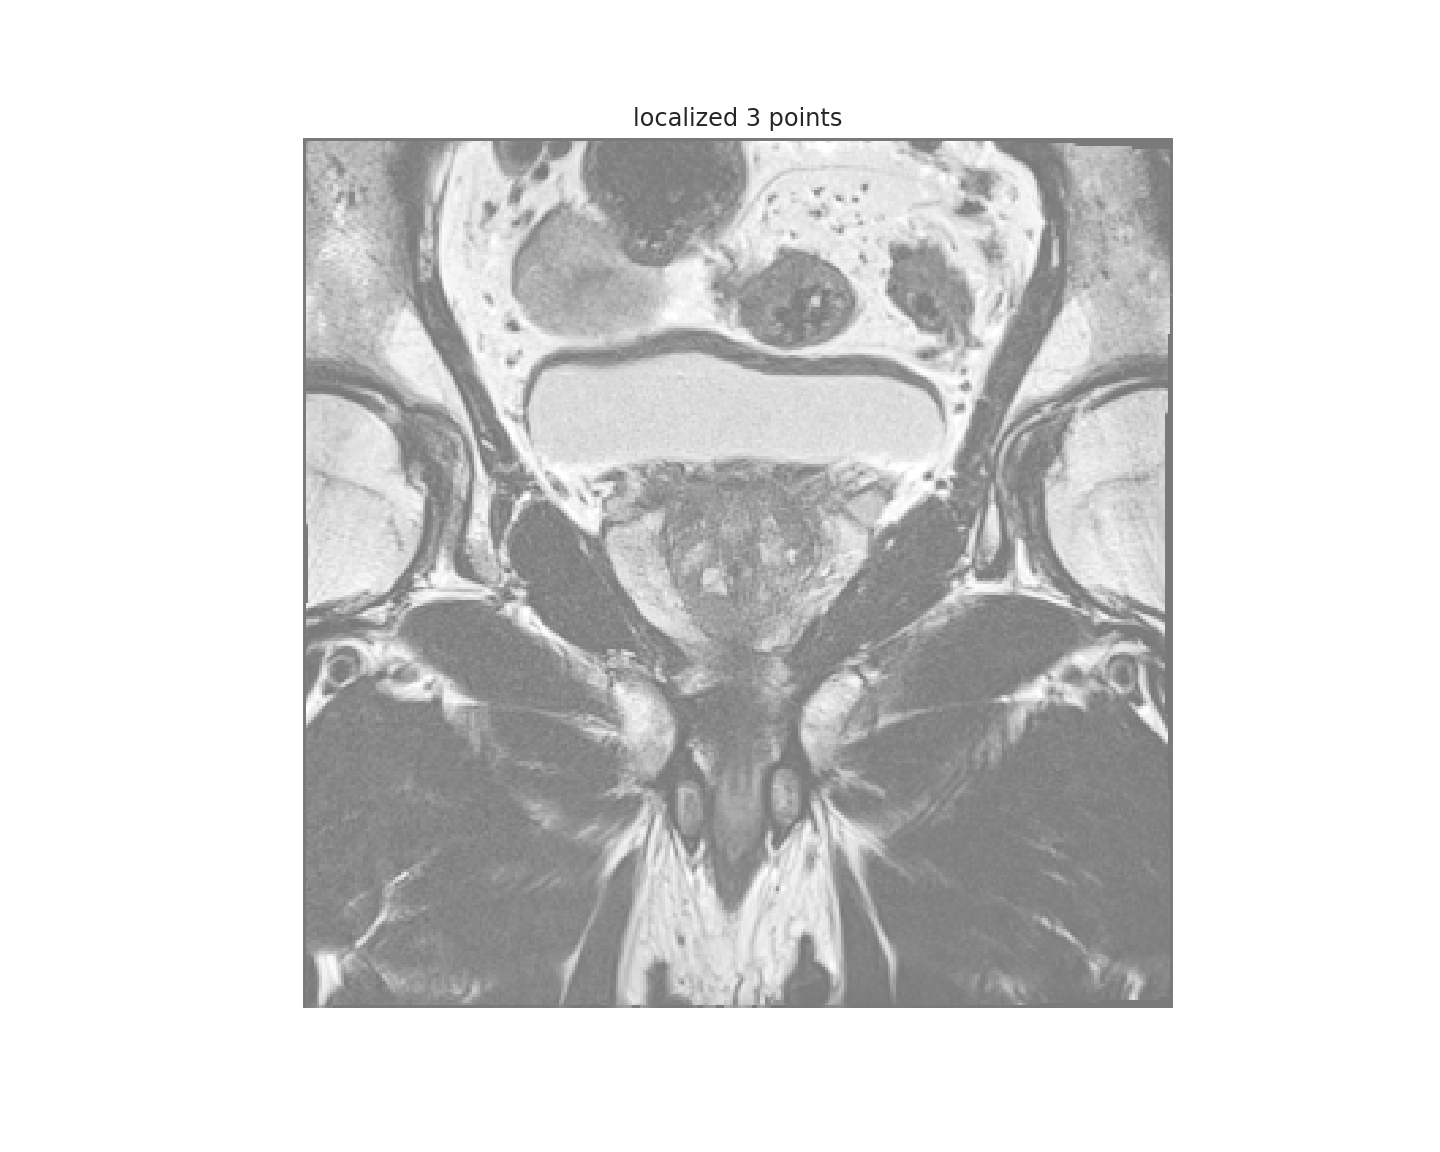

In [170]:
import gui
p2 = '/project2/msca/projects/ProstateMRI/data/PROSTATEx-team1/ProstateX/Train/DATAPREP/nrrd-train/ProstateX-0168_t2_tse_cor_4.nrrd'

NRRDreader = sitk.ImageFileReader()
NRRDreader.SetImageIO("NrrdImageIO")
NRRDreader.SetFileName(p2)
image_nrrd = NRRDreader.Execute();
%matplotlib notebook

size_nrrd = image_nrrd.GetSize()
spacing_nrrd = image_nrrd.GetSpacing()

print("Image size:", size_nrrd[0], size_nrrd[1], size_nrrd[2], spacing_nrrd)

point_acquisition_interface = gui.PointDataAquisition(image_nrrd, (1000,100))
point_acquisition_interface.set_point_indexes([(188, 184, 13),
(211, 216, 10),
(164, 224, 10)]) #45, 70, 9 ,33 71 12

Image size: 320 320 15 (0.6000000238418599, 0.6000000238418601, 2.9999988079071045)


<IPython.core.display.Javascript object>


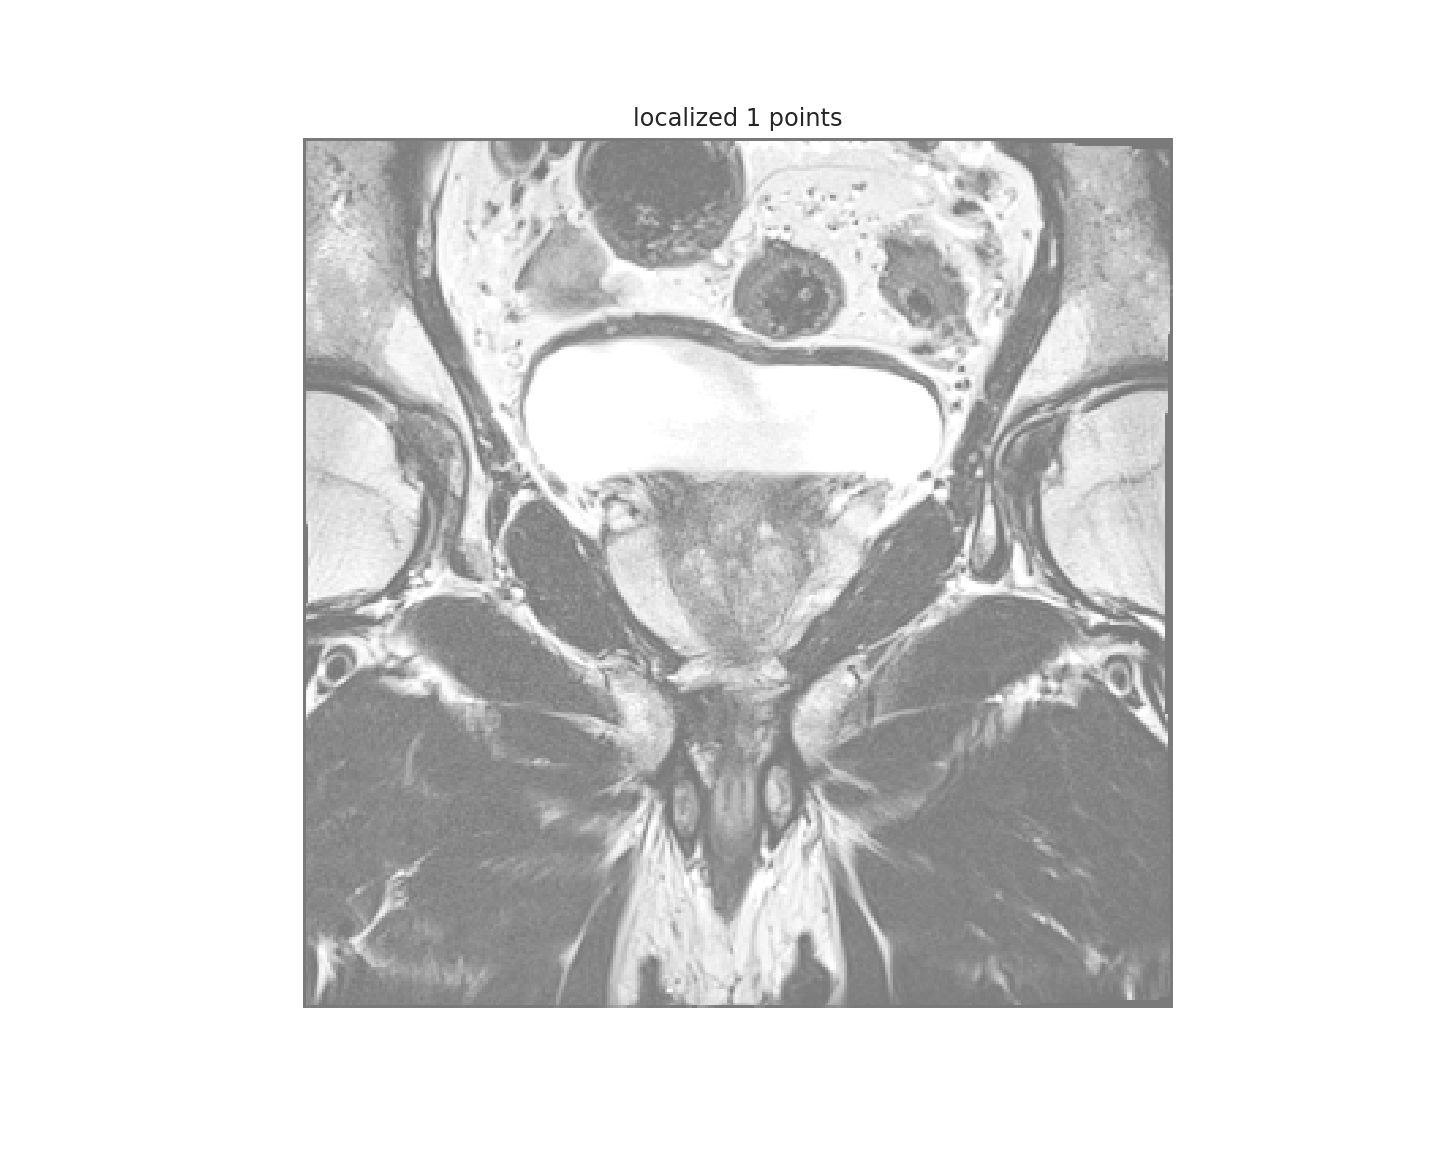

In [172]:

p2 = '/project2/msca/projects/ProstateMRI/data/PROSTATEx-team1/ProstateX/Train/DATAPREP/nrrd-train/ProstateX-0168_t2_tse_cor_56.nrrd'

NRRDreader = sitk.ImageFileReader()
NRRDreader.SetImageIO("NrrdImageIO")
NRRDreader.SetFileName(p2)
image_nrrd = NRRDreader.Execute();
%matplotlib notebook

size_nrrd = image_nrrd.GetSize()
spacing_nrrd = image_nrrd.GetSpacing()

print("Image size:", size_nrrd[0], size_nrrd[1], size_nrrd[2], spacing_nrrd)

point_acquisition_interface = gui.PointDataAquisition(image_nrrd, (1000,100))
point_acquisition_interface.set_point_indexes([(179,199,9)]) #45, 70, 9 ,33 71 12

In [223]:
# move these dups into a 'delete folder'
# check_list = ["ProstateX-0008_t2_tse_sag_3.nrrd",
# "ProstateX-0019_t2_tse_tra_5.nrrd",
# "ProstateX-0126_t2_tse_tra_4.nrrd",
# "ProstateX-0191_ADC_S3_2_10.nrrd",
# "ProstateX-0191_ep2d_diff_tra2x2_Noise0_FS_DYNDIST_ADC_4.nrrd",
# "ProstateX-0191_ep2d_diff_tra2x2_Noise0_NoFS_DYNDIST_ADC_8.nrrd",
# "ProstateX-0191_ep2d_diff_tra2x2_Noise0_NoFS_DYNDISTCALC_BVAL_9.nrrd"]
#"ProstateX-0001_t2_tse_tra_10.nrrd",
#"ProstateX-0007_t2_tse_sag_3.nrrd",
# "ProstateX-0010_t2_tse_tra_4.nrrd",
# "ProstateX-0011_t2_tse_tra_4.nrrd",
# "ProstateX-0012_t2_tse_sag_3.nrrd",
# "ProstateX-0031_ep2d_diff_tra_DYNDIST_ADC_11.nrrd",
# "ProstateX-0031_ep2d_diff_tra_DYNDISTCALC_BVAL_12.nrrd",
# "ProstateX-0031_t2_tse_tra_9.nrrd",
# "ProstateX-0032_t2_tse_tra_exacte_copy_diffusie_55.nrrd",
# "ProstateX-0034_t2_tse_tra_9.nrrd",
# "ProstateX-0042_t2_tse_tra_9.nrrd",
# "ProstateX-0052_t2_tse_tra_6.nrrd",
# "ProstateX-0054_t2_tse_tra_8.nrrd",
# "ProstateX-0057_t2_tse_sag_3.nrrd",
# "ProstateX-0059_t2_tse_sag_3.nrrd",
# "ProstateX-0061_t2_tse_tra_4.nrrd",
# "ProstateX-0063_t2_tse_sag_7.nrrd",
# "ProstateX-0074_t2_tse_tra_9.nrrd",
# "ProstateX-0074_t2_tse_tra_4.nrrd",
# "ProstateX-0077_t2_tse_tra_4.nrrd",
# "ProstateX-0079_t2_tse_tra_4.nrrd",
# "ProstateX-0086_t2_tse_sag_3.nrrd",
# "ProstateX-0095_t2_tse_tra_4.nrrd",
# "ProstateX-0097_t2_tse_tra_5.nrrd",
# "ProstateX-0098_t2_tse_tra_4.nrrd",
# "ProstateX-0099_t2_tse_tra_5.nrrd",
# "ProstateX-0101_t2_tse_tra_4.nrrd",
# "ProstateX-0102_t2_tse_tra_5.nrrd",
# "ProstateX-0105_t2_tse_tra_5.nrrd",
# "ProstateX-0112_t2_tse_tra_4.nrrd",
# "ProstateX-0113_t2_tse_tra_6.nrrd",
# "ProstateX-0114_t2_tse_sag_3.nrrd",
# "ProstateX-0114_t2_tse_tra_4.nrrd",
# "ProstateX-0116_t2_tse_tra_4.nrrd",
# "ProstateX-0122_t2_tse_tra_7.nrrd",
# "ProstateX-0123_t2_tse_tra_5.nrrd",
# "ProstateX-0125_t2_tse_tra_6.nrrd",
# "ProstateX-0128_t2_tse_sag_3.nrrd",
# "ProstateX-0132_t2_tse_tra_5.nrrd",
# "ProstateX-0141_t2_tse_tra_4.nrrd",
# "ProstateX-0147_t2_tse_tra_4.nrrd",
# "ProstateX-0148_t2_tse_tra_4.nrrd",
# "ProstateX-0149_t2_tse_tra_4.nrrd",
# "ProstateX-0152_t2_tse_tra_4.nrrd",
# "ProstateX-0153_t2_tse_tra_4.nrrd",
# "ProstateX-0155_t2_tse_tra_4.nrrd",
# "ProstateX-0160_t2_tse_tra_4.nrrd",
# "ProstateX-0165_t2_tse_tra_4.nrrd",
# "ProstateX-0166_t2_tse_sag_3.nrrd",
# "ProstateX-0166_t2_tse_tra_4.nrrd",
# "ProstateX-0168_t2_tse_cor_4.nrrd",
# "ProstateX-0168_t2_tse_tra_5.nrrd",
# "ProstateX-0171_t2_tse_tra_4.nrrd",
# "ProstateX-0173_t2_tse_sag_3.nrrd",
# "ProstateX-0173_t2_tse_tra_5.nrrd",
# "ProstateX-0173_t2_tse_tra_9.nrrd",
# "ProstateX-0176_t2_tse_tra_4.nrrd",
# "ProstateX-0179_t2_tse_sag_3.nrrd",
# "ProstateX-0179_t2_tse_tra_5.nrrd",
# "ProstateX-0181_t2_tse_tra_4.nrrd",
# "ProstateX-0185_t2_tse_tra_5.nrrd",
# "ProstateX-0186_t2_tse_tra_5.nrrd",
# "ProstateX-0189_t2_tse_cor_5.nrrd",
# "ProstateX-0190_ep2d_diff_tra_DYNDIST_ADC_7.nrrd",
# "ProstateX-0190_ep2d_diff_tra_DYNDISTCALC_BVAL_8.nrrd",
# "ProstateX-0191_ADC_S3_1_6.nrrd",
# "ProstateX-0191_ep2d_diff_tra2x2_Noise0_FS_DYNDISTCALC_BVAL_5.nrrd",
# "ProstateX-0197_t2_tse_sag_3.nrrd",
# "ProstateX-0197_t2_tse_tra_5.nrrd",
# "ProstateX-0200_t2_tse_tra_5.nrrd",
# "ProstateX-0203_t2_tse_sag_3.nrrd"]

In [224]:
len(check_list)

7

In [225]:
import os
import shutil
#shutil.move("path/to/current/file.foo", "path/to/new/destination/for/file.foo")

In [226]:
for i in check_list: print(i)

ProstateX-0008_t2_tse_sag_3.nrrd
ProstateX-0019_t2_tse_tra_5.nrrd
ProstateX-0126_t2_tse_tra_4.nrrd
ProstateX-0191_ADC_S3_2_10.nrrd
ProstateX-0191_ep2d_diff_tra2x2_Noise0_FS_DYNDIST_ADC_4.nrrd
ProstateX-0191_ep2d_diff_tra2x2_Noise0_NoFS_DYNDIST_ADC_8.nrrd
ProstateX-0191_ep2d_diff_tra2x2_Noise0_NoFS_DYNDISTCALC_BVAL_9.nrrd


In [238]:
path = "/project2/msca/projects/ProstateMRI/data/PROSTATEx-team1/ProstateX/Train/DATAPREP/nrrd-train/"
for i in check_list:
    
    shutil.move(path+i, os.path.join("/project2/msca/projects/ProstateMRI/data/PROSTATEx-team1/ProstateX/Train/DATAPREP/delete_dups/",i))

In [239]:
final_list = os.listdir('/project2/msca/projects/ProstateMRI/data/PROSTATEx-team1/ProstateX/Train/DATAPREP/nrrd-train')

In [240]:
final_list = pd.DataFrame(final_list)
final_list.shape

(1224, 1)

In [241]:
final_list['pid'] = final_list[0].apply(lambda x: x.split('_',1)[0])
final_list['series'] = final_list[0].apply(lambda x: x.split('_',1)[1])

In [242]:
final_list

0             pid  \
0                            ProstateX-0147_Ktrans.nrrd  ProstateX-0147   
1     ProstateX-0162_ep2d_diff_tra_DYNDISTCALC_BVAL_...  ProstateX-0162   
2                      ProstateX-0130_t2_tse_sag_3.nrrd  ProstateX-0130   
3     ProstateX-0059_ep2d_diff_tra_DYNDISTCALC_BVAL_...  ProstateX-0059   
4                            ProstateX-0058_Ktrans.nrrd  ProstateX-0058   
5       ProstateX-0012_ep2d_diff_tra_DYNDIST_ADC_8.nrrd  ProstateX-0012   
6                      ProstateX-0013_t2_tse_sag_3.nrrd  ProstateX-0013   
7                      ProstateX-0121_t2_tse_tra_4.nrrd  ProstateX-0121   
8                            ProstateX-0110_Ktrans.nrrd  ProstateX-0110   
9                            ProstateX-0024_Ktrans.nrrd  ProstateX-0024   
10                     ProstateX-0001_t2_tse_cor_5.nrrd  ProstateX-0001   
11                     ProstateX-0088_t2_tse_tra_4.nrrd  ProstateX-0088   
12                           ProstateX-0200_Ktrans.nrrd  ProstateX-0200   
13                     ProstateX-0014_t2_tse_sag_3.nrrd  ProstateX-0014   
14                     ProstateX-0092_t2_tse_cor_5.nrrd  ProstateX-0092   
15      ProstateX-0028_ep2d_diff_tra_DYNDIST_ADC_7.nrrd  ProstateX-0028   
16    ProstateX-0072_ep2d_diff_tra_DYNDISTCALC_BVAL_...  ProstateX-0072   
17                     ProstateX-0018_t2_tse_cor_4.nrrd  ProstateX-0018   
18                           ProstateX-0135_Ktrans.nrrd  ProstateX-0135   
19                           ProstateX-0167_Ktrans.nrrd  ProstateX-0167   
20      ProstateX-0034_ep2d_diff_tra_DYNDIST_ADC_7.nrrd  ProstateX-0034   
21      ProstateX-0023_ep2d_diff_tra_DYNDIST_ADC_7.nrrd  ProstateX-0023   
22                     ProstateX-0152_t2_tse_sag_3.nrrd  ProstateX-0152   
23                     ProstateX-0052_t2_tse_tra_4.nrrd  ProstateX-0052   
24    ProstateX-0170_ep2d_diff_tra_DYNDISTCALC_BVAL_...  ProstateX-0170   
25                           ProstateX-0086_Ktrans.nrrd  ProstateX-0086   
26                     ProstateX-0117_t2_tse_sag_3.nrrd  ProstateX-0117   
27                     ProstateX-0200_t2_tse_sag_4.nrrd  ProstateX-0200   
28    ProstateX-0079_ep2d_diff_tra_DYNDISTCALC_BVAL_...  ProstateX-0079   
29                     ProstateX-0025_t2_tse_sag_3.nrrd  ProstateX-0025   
30                     ProstateX-0073_t2_tse_sag_3.nrrd  ProstateX-0073   
31                           ProstateX-0126_Ktrans.nrrd  ProstateX-0126   
32    ProstateX-0003_ep2d_diff_tra_DYNDISTCALC_BVAL_...  ProstateX-0003   
33    ProstateX-0011_ep2d_diff_tra_DYNDISTCALC_BVAL_...  ProstateX-0011   
34                     ProstateX-0124_t2_tse_tra_5.nrrd  ProstateX-0124   
35                     ProstateX-0099_t2_tse_cor_4.nrrd  ProstateX-0099   
36                     ProstateX-0187_t2_tse_tra_4.nrrd  ProstateX-0187   
37                           ProstateX-0084_Ktrans.nrrd  ProstateX-0084   
38                     ProstateX-0063_t2_tse_tra_6.nrrd  ProstateX-0063   
39                           ProstateX-0087_Ktrans.nrrd  ProstateX-0087   
40                     ProstateX-0158_t2_tse_cor_5.nrrd  ProstateX-0158   
41                     ProstateX-0003_t2_tse_cor_4.nrrd  ProstateX-0003   
42      ProstateX-0183_ep2d_diff_tra_DYNDIST_ADC_7.nrrd  ProstateX-0183   
43                     ProstateX-0017_t2_tse_tra_5.nrrd  ProstateX-0017   
44                     ProstateX-0002_t2_tse_tra_4.nrrd  ProstateX-0002   
45     ProstateX-0054_ep2d_diff_tra_DYNDIST_ADC_11.nrrd  ProstateX-0054   
46    ProstateX-0116_ep2d_diff_tra_DYNDISTCALC_BVAL_...  ProstateX-0116   
47    ProstateX-0095_ep2d_diff_tra_DYNDIST_MIXCALC_B...  ProstateX-0095   
48      ProstateX-0082_ep2d_diff_tra_DYNDIST_ADC_7.nrrd  ProstateX-0082   
49    ProstateX-0055_ep2d_diff_tra_DYNDISTCALC_BVAL_...  ProstateX-0055   
50                     ProstateX-0136_t2_tse_cor_5.nrrd  ProstateX-0136   
51                     ProstateX-0039_t2_tse_cor_4.nrrd  ProstateX-0039   
52                     ProstateX-0106_t2_tse_cor_6.nrrd  ProstateX-0106   
53  

In [243]:
final_list.groupby('pid').count()

0  series
pid                      
ProstateX-0000  6       6
ProstateX-0001  6       6
ProstateX-0002  6       6
ProstateX-0003  6       6
ProstateX-0004  6       6
ProstateX-0005  6       6
ProstateX-0006  6       6
ProstateX-0007  6       6
ProstateX-0008  6       6
ProstateX-0009  6       6
ProstateX-0010  6       6
ProstateX-0011  6       6
ProstateX-0012  6       6
ProstateX-0013  6       6
ProstateX-0014  6       6
ProstateX-0015  6       6
ProstateX-0016  6       6
ProstateX-0017  6       6
ProstateX-0018  6       6
ProstateX-0019  6       6
ProstateX-0020  6       6
ProstateX-0021  6       6
ProstateX-0022  6       6
ProstateX-0023  6       6
ProstateX-0024  6       6
ProstateX-0025  6       6
ProstateX-0026  6       6
ProstateX-0027  6       6
ProstateX-0028  6       6
ProstateX-0029  6       6
ProstateX-0030  6       6
ProstateX-0031  6       6
ProstateX-0032  6       6
ProstateX-0033  6       6
ProstateX-0034  6       6
ProstateX-0035  6       6
ProstateX-0036  6       6
ProstateX-0037  6       6
ProstateX-0038  6       6
ProstateX-0039  6       6
ProstateX-0040  6       6
ProstateX-0041  6       6
ProstateX-0042  6       6
ProstateX-0043  6       6
ProstateX-0044  6       6
ProstateX-0045  6       6
ProstateX-0046  6       6
ProstateX-0047  6       6
ProstateX-0048  6       6
ProstateX-0049  6       6
ProstateX-0050  6       6
ProstateX-0051  6       6
ProstateX-0052  6       6
ProstateX-0053  6       6
ProstateX-0054  6       6
ProstateX-0055  6       6
ProstateX-0056  6       6
ProstateX-0057  6       6
ProstateX-0058  6       6
ProstateX-0059  6       6
ProstateX-0060  6       6
ProstateX-0061  6       6
ProstateX-0062  6       6
ProstateX-0063  6       6
ProstateX-0064  6       6
ProstateX-0065  6       6
ProstateX-0066  6       6
ProstateX-0067  6       6
ProstateX-0068  6       6
ProstateX-0069  6       6
ProstateX-0070  6       6
ProstateX-0071  6       6
ProstateX-0072  6       6
ProstateX-0073  6       6
ProstateX-0074  6       6
ProstateX-0075  6       6
ProstateX-0076  6       6
ProstateX-0077  6       6
ProstateX-0078  6       6
ProstateX-0079  6       6
ProstateX-0080  6       6
ProstateX-0081  6       6
ProstateX-0082  6       6
ProstateX-0083  6       6
ProstateX-0084  6       6
ProstateX-0085  6       6
ProstateX-0086  6       6
ProstateX-0087  6       6
ProstateX-0088  6       6
ProstateX-0089  6       6
ProstateX-0090  6       6
ProstateX-0091  6       6
ProstateX-0092  6       6
ProstateX-0093  6       6
ProstateX-0094  6       6
ProstateX-0095  6       6
ProstateX-0096  6       6
ProstateX-0097  6       6
ProstateX-0098  6       6
ProstateX-0099  6       6
ProstateX-0100  6       6
ProstateX-0101  6       6
ProstateX-0102  6       6
ProstateX-0103  6       6
ProstateX-0104  6       6
ProstateX-0105  6       6
ProstateX-0106  6       6
ProstateX-0107  6       6
ProstateX-0108  6       6
ProstateX-0109  6       6
ProstateX-0110  6       6
ProstateX-0111  6       6
ProstateX-0112  6       6
ProstateX-0113  6       6
ProstateX-0114  6       6
ProstateX-0115  6       6
ProstateX-0116  6       6
ProstateX-0117  6       6
ProstateX-0118  6       6
ProstateX-0119  6       6
ProstateX-0120  6       6
ProstateX-0121  6       6
ProstateX-0122  6       6
ProstateX-0123  6       6
ProstateX-0124  6       6
ProstateX-0125  6       6
ProstateX-0126  6       6
ProstateX-0127  6       6
ProstateX-0128  6       6
ProstateX-0129  6       6
ProstateX-0130  6       6
ProstateX-0131  6       6
ProstateX-0132  6       6
ProstateX-0133  6       6
ProstateX-0134  6       6
ProstateX-0135  6       6
ProstateX-0136  6       6
ProstateX-0137  6       6
ProstateX-0138  6       6
ProstateX-0139  6       6
ProstateX-0140  6       6
ProstateX-0141  6       6
ProstateX-0142  6       6
ProstateX-0143  6       6
ProstateX-0144  6       6
ProstateX-0145  6       6
ProstateX-0146  6       6
ProstateX-0147  6       6
ProstateX-0148  6       6
ProstateX-0149  6       6
ProstateX-0150  6       6
ProstateX-0151  6       6
ProstateX-01

## Lastly, we also deleted patients thta have negative ks, which are p21,25,124,130

# Read nrrd data

In [43]:
example_filename = '/project2/msca/projects/ProstateMRI/data/PROSTATEx-team1/ProstateX/Train/DATAPREP/nrrd-train/ProstateX-0001_t2_tse_cor_5.nrrd'

In [44]:
import gui
data = sitk.ReadImage(example_filename)
LabelImageArray = sitk.GetArrayFromImage(data)
LabelImageArray

array([[[  0,   0,   0, ...,   0,   0,   0],
        [  0,   1,   1, ...,  67,  78,   9],
        [  0,   4,   0, ...,  82,  76,   7],
        ...,
        [  0,   0,   0, ..., 380, 405,   0],
        [  0,   5,   0, ..., 347, 378,   6],
        [  0,   2,  10, ..., 112, 106,  41]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   1,   0, ...,  68, 106,  11],
        [  0,   6,   0, ...,  78, 121,   3],
        ...,
        [  0,   0,   0, ..., 417, 449,   0],
        [  0,   4,   0, ..., 393, 406,   0],
        [  0,   3,  12, ..., 135,  97,  26]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ..., 186, 261,  38],
        [  0,   7,   0, ..., 252, 294,   0],
        ...,
        [  0,   0,   0, ..., 206, 247,   0],
        [  0,   3,   0, ..., 179, 218,   0],
        [  0,   6,   5, ...,  75,  69,  24]],

       ...,

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   1, ...,   0,   4,   3],
        [  0,   2,   2, ...,  93,  69,   4

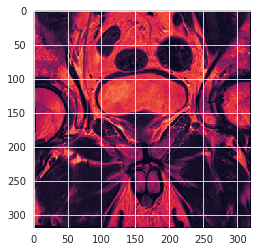

In [27]:
plt.imshow(LabelImageArray[2])

# Use gui to show the cancer area interactively

In [26]:
import gui

In [27]:
#T2

In [53]:
p000 = '/project2/msca/projects/ProstateMRI/data/PROSTATEx-team1/ProstateX/Train/DATAPREP/nrrd-train/ProstateX-0001_t2_tse_tra_10.nrrd'

In [54]:
NRRDreader = sitk.ImageFileReader()
NRRDreader.SetImageIO("NrrdImageIO")
NRRDreader.SetFileName(p000)
image_nrrd = NRRDreader.Execute()#;
%matplotlib notebook

In [55]:
size_nrrd = image_nrrd.GetSize()
spacing_nrrd = image_nrrd.GetSpacing()

In [56]:
print("Image size:", size_nrrd[0], size_nrrd[1], size_nrrd[2], spacing_nrrd)

Image size: 384 384 19 (0.5, 0.5000000000000002, 2.9999988079071063)


<IPython.core.display.Javascript object>


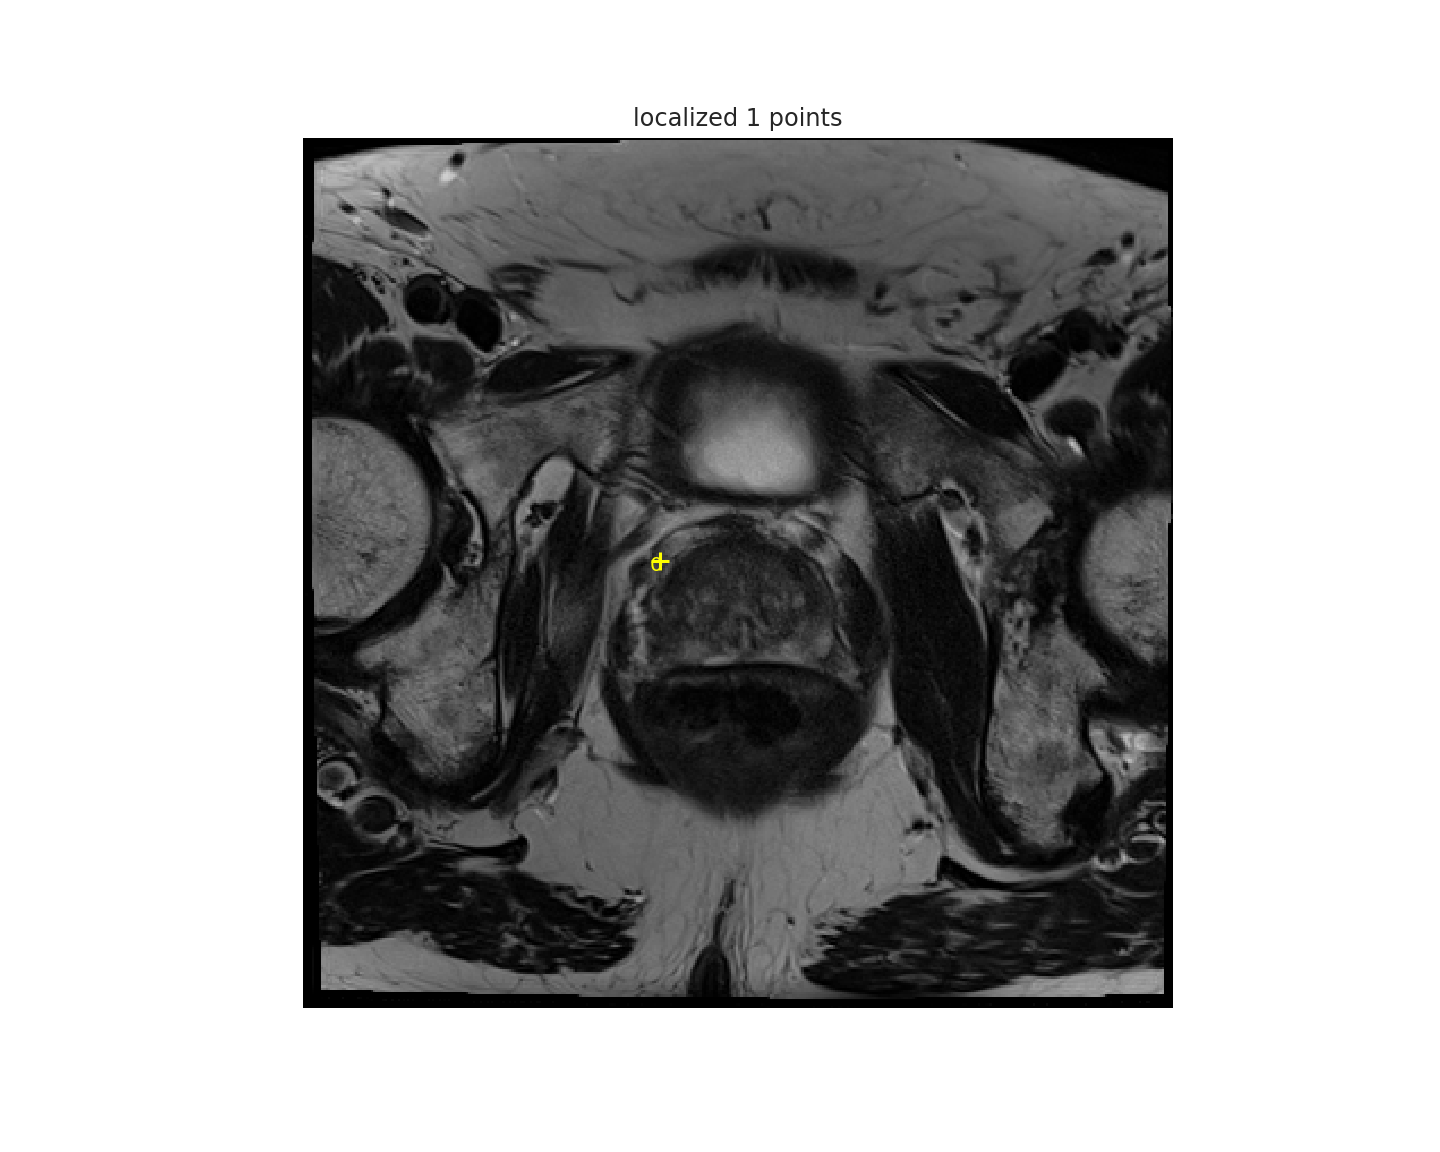

In [57]:
point_acquisition_interface = gui.PointDataAquisition(image_nrrd)
point_acquisition_interface.set_point_indexes([(157,186,10)])

In [58]:
#ADC

In [59]:
p25 = '/project2/msca/projects/ProstateMRI/data/PROSTATEx-team1/ProstateX/Train/DATAPREP/nrrd-train/ProstateX-0025_ep2d_diff_tra_DYNDIST_ADC_7.nrrd'

In [60]:
NRRDreader = sitk.ImageFileReader()
NRRDreader.SetImageIO("NrrdImageIO")
NRRDreader.SetFileName(p25)
image_nrrd = NRRDreader.Execute();
%matplotlib notebook

In [61]:
size_nrrd = image_nrrd.GetSize()
spacing_nrrd = image_nrrd.GetSpacing()

In [62]:
print("Image size:", size_nrrd[0], size_nrrd[1], size_nrrd[2], spacing_nrrd)

Image size: 84 128 21 (2.0, 2.0, 2.9999983310699467)


<IPython.core.display.Javascript object>


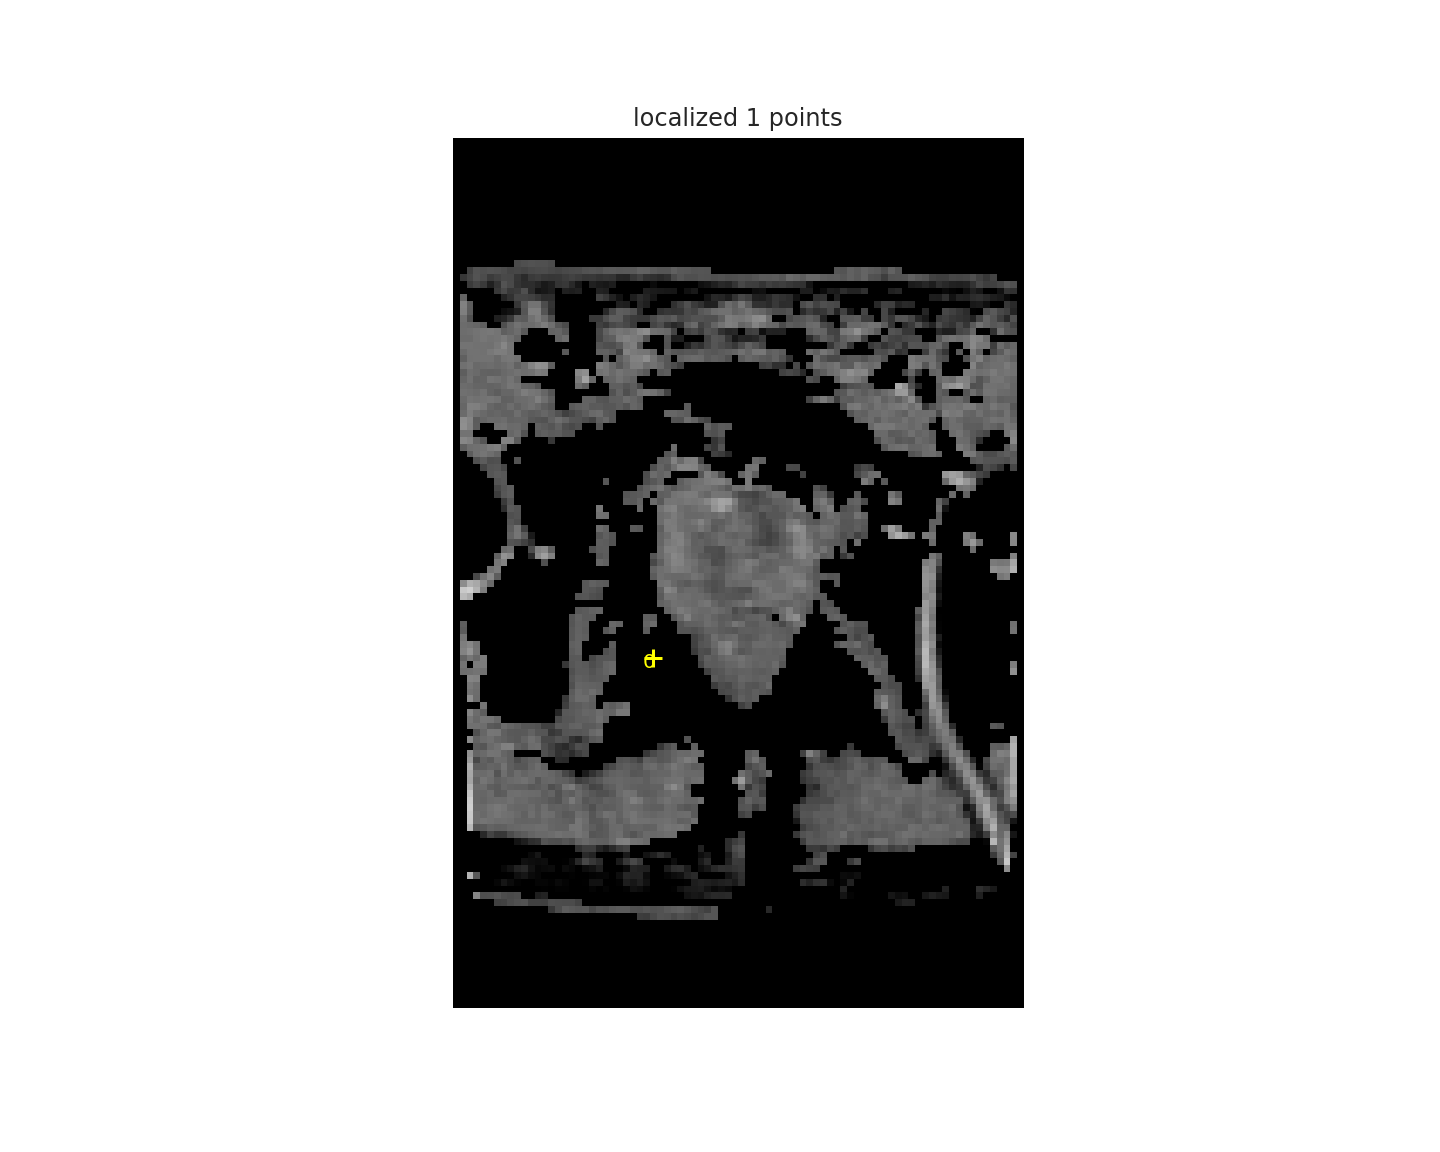

In [63]:
point_acquisition_interface = gui.PointDataAquisition(image_nrrd)
point_acquisition_interface.set_point_indexes([(29, 76, 8)]) #29, 76, -8

In [64]:
# BVAL

Image size: 84 128 19 (2.0, 2.0, 3.0000016689300546)


<IPython.core.display.Javascript object>


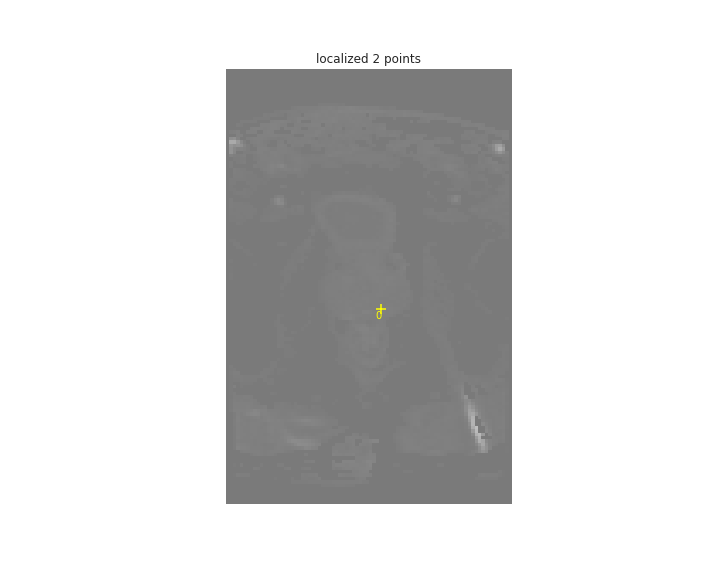

In [74]:
p2 = '/project2/msca/projects/ProstateMRI/data/PROSTATEx-team1/ProstateX/Train/DATAPREP/nrrd-train/ProstateX-0002_ep2d_diff_tra_DYNDISTCALC_BVAL_8.nrrd'

NRRDreader = sitk.ImageFileReader()
NRRDreader.SetImageIO("NrrdImageIO")
NRRDreader.SetFileName(p2)
image_nrrd = NRRDreader.Execute();
%matplotlib notebook

size_nrrd = image_nrrd.GetSize()
spacing_nrrd = image_nrrd.GetSpacing()

print("Image size:", size_nrrd[0], size_nrrd[1], size_nrrd[2], spacing_nrrd)

point_acquisition_interface = gui.PointDataAquisition(image_nrrd, (1000,100))
point_acquisition_interface.set_point_indexes([(45, 70, 9),(33, 71, 12)]) #45, 70, 9 ,33 71 12

Image size: 320 320 19 (0.5625, 0.5625, 3.5999984741210938)


<IPython.core.display.Javascript object>


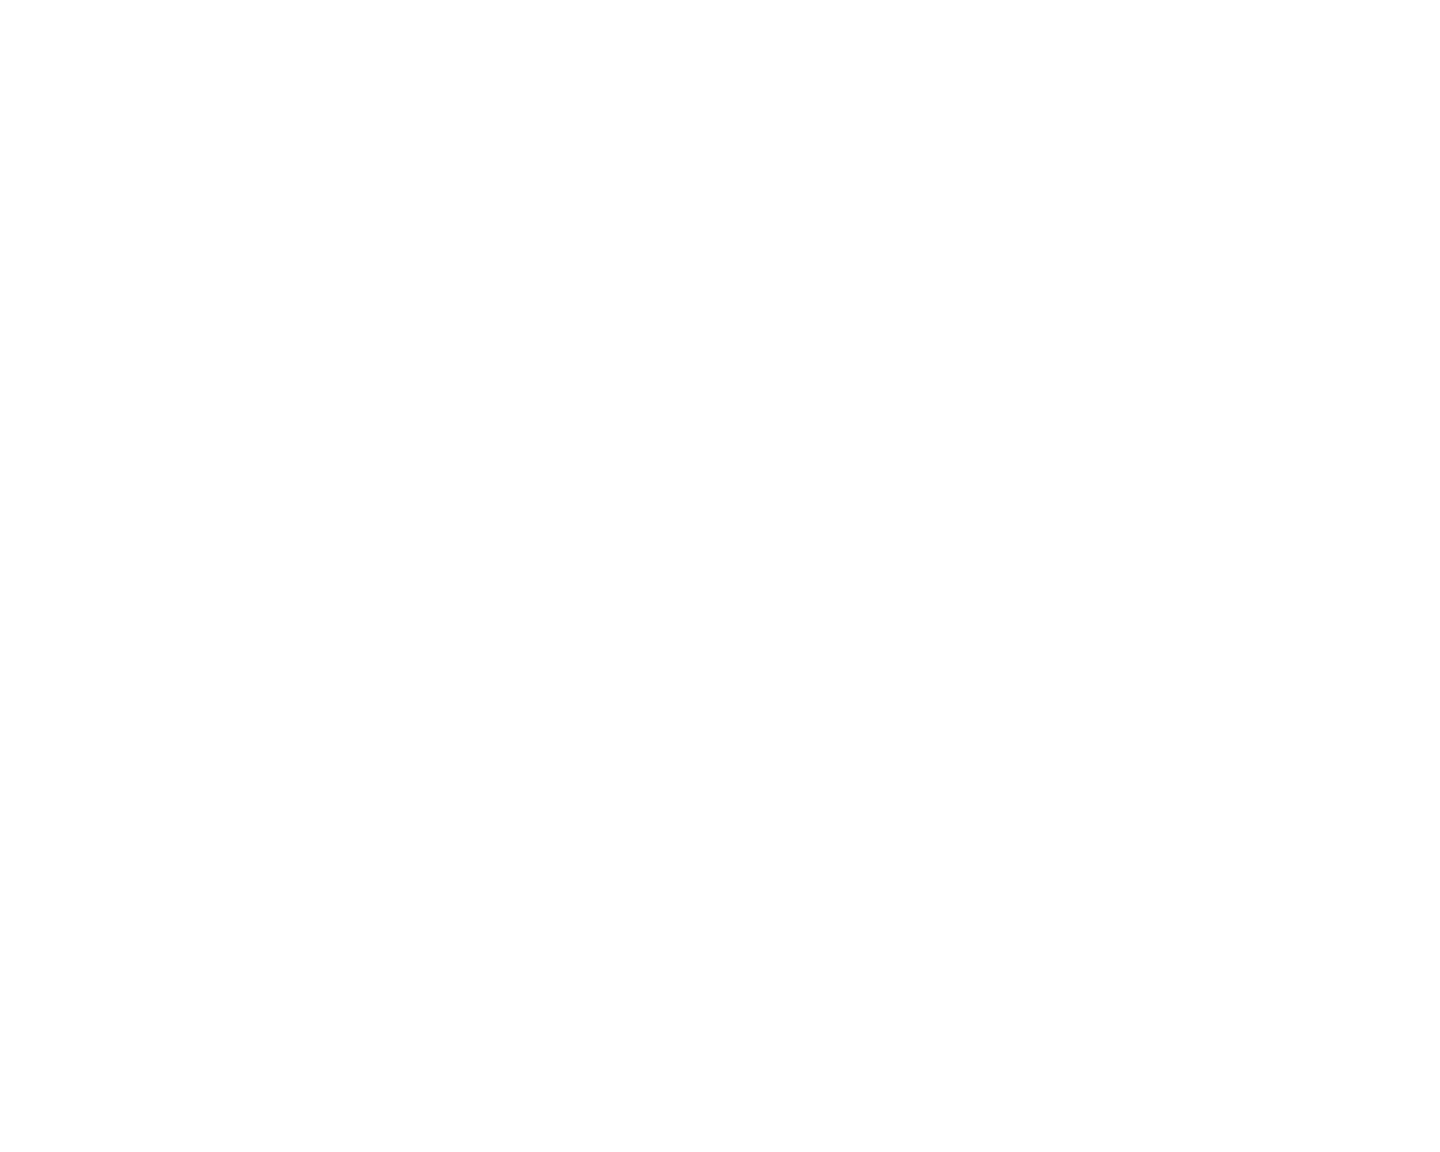

In [39]:
#negative k
p21 = '/project2/msca/projects/ProstateMRI/data/PROSTATEx-team1/ProstateX/Train/DATAPREP/nrrd-train/ProstateX-0021_t2_tse_sag_3.nrrd'

NRRDreader = sitk.ImageFileReader()
NRRDreader.SetImageIO("NrrdImageIO")
NRRDreader.SetFileName(p21)
image_nrrd = NRRDreader.Execute();
%matplotlib notebook

size_nrrd = image_nrrd.GetSize()
spacing_nrrd = image_nrrd.GetSpacing()

print("Image size:", size_nrrd[0], size_nrrd[1], size_nrrd[2], spacing_nrrd)

point_acquisition_interface = gui.PointDataAquisition(image_nrrd)
point_acquisition_interface.set_point_indexes([(130,139,1)]) #130 139 -1

<IPython.core.display.Javascript object>


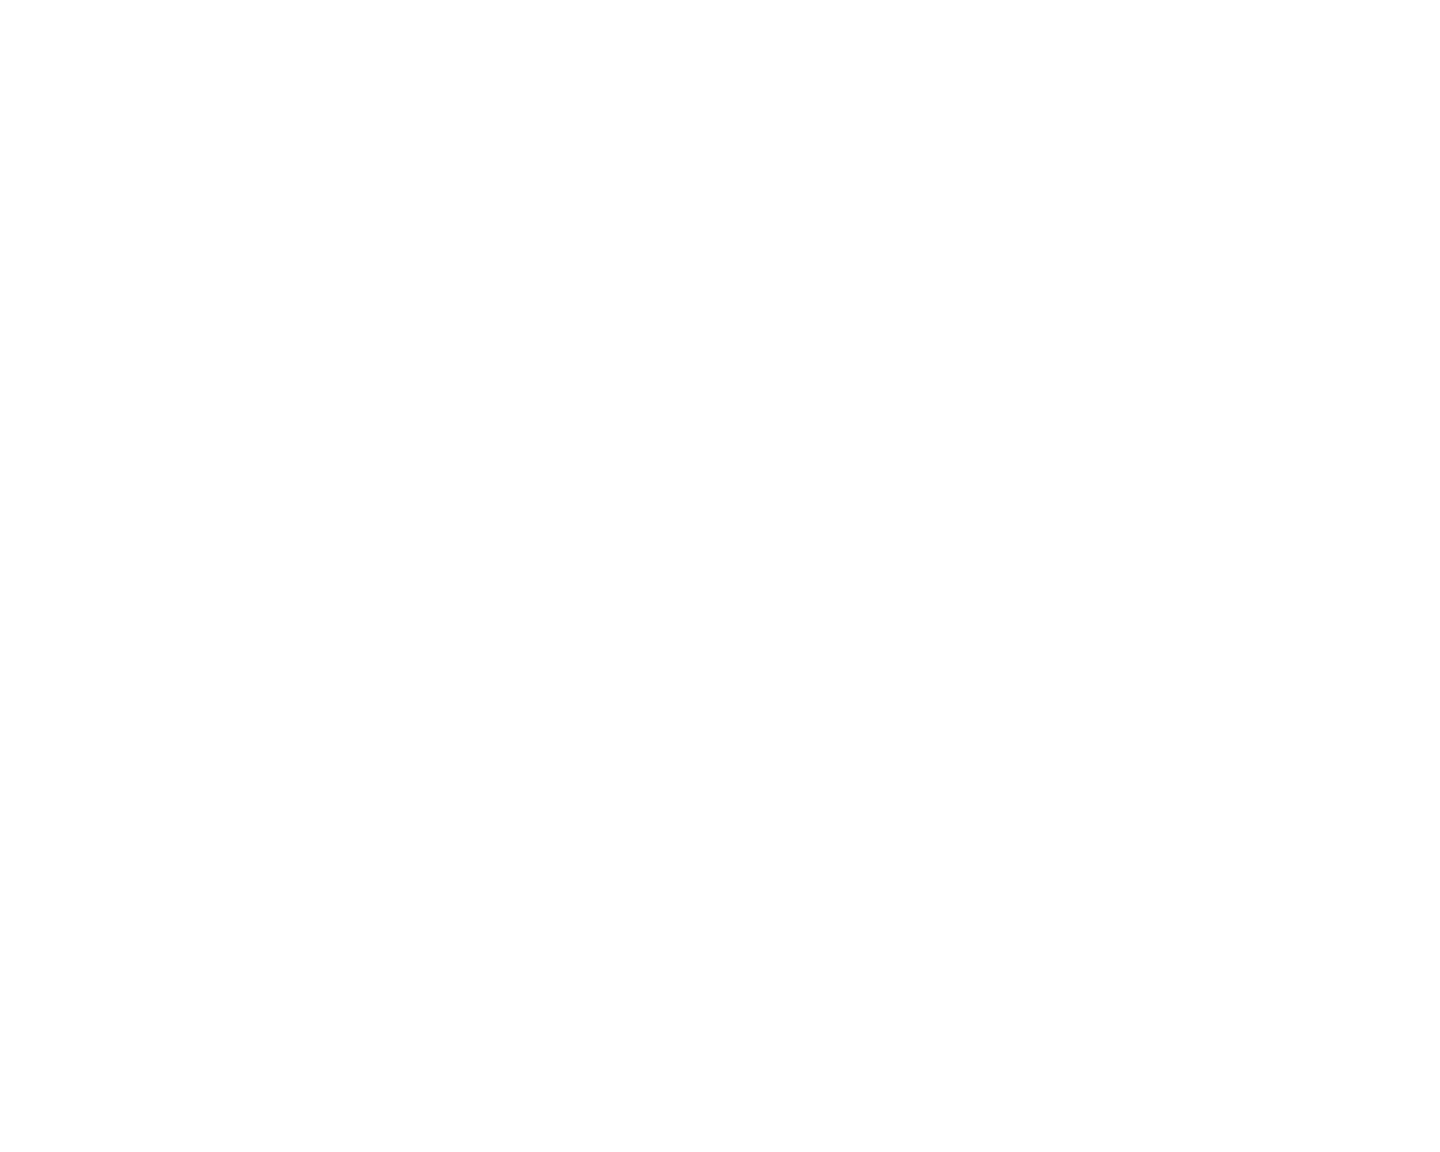

In [40]:
point_acquisition_interface2 = gui.PointDataAquisition(image_nrrd)
point_acquisition_interface2.set_point_indexes([(185,164,17), (204,80,12), (186,163,17)])

In [43]:
def ExtractMargin(LabelImageArray):
    MarginExtractedImage = np.zeros(tuple(LabelImageArray.shape))
    for k in range(LabelImageArray.shape[0]):
        CurrentSlice = LabelImageArray[k, :, :]
        for i in range(CurrentSlice.shape[0]):
            idx = np.asanyarray(np.where(CurrentSlice[i, :] == 1)).T
            try:
                MarginExtractedImage[k, i, idx[0]] = 1
                MarginExtractedImage[k, i, idx[-1]] = 1
            except:
                pass
        for j in range(CurrentSlice.shape[1]):
            idx = np.asanyarray(np.where(CurrentSlice[:, j] == 1)).T
            try:
                MarginExtractedImage[k, idx[0], j] = 1
                MarginExtractedImage[k, idx[-1], j] = 1
            except:
                pass
    return MarginExtractedImage

In [44]:
ProstateMargin = ExtractMargin(LabelImageArray)
ProstateMarginCoordinates = np.asanyarray(np.where(ProstateMargin == 1)).T

<IPython.core.display.Javascript object>


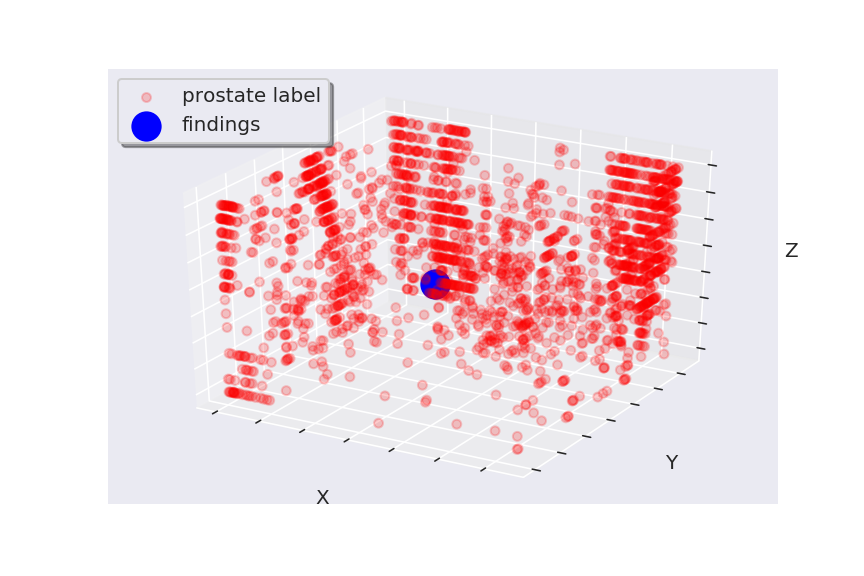

[]

In [45]:
IJKLocation=np.array([ 131., 177., 6.])

fig = plt.figure()
from mpl_toolkits.mplot3d import Axes3D
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ProstateMarginCoordinates[:,2], ProstateMarginCoordinates[:,1], ProstateMarginCoordinates[:,0], c='r',alpha=0.2, label='prostate label')
ax.scatter(IJKLocation[0],IJKLocation[1],IJKLocation[2],c='b',s=200, label='findings')
# ax.scatter(CenterOfMass[0],CenterOfMass[1],CenterOfMass[2],c='y',s=300)
plt.legend(loc="upper left", 
           ncol=1, shadow=True, fancybox=True)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_zticklabels([])